In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
from sklearn.preprocessing import RobustScaler

In [4]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [5]:
elderly_life=pd.read_csv("노인생활인구_최종.csv",encoding="cp949")
elderly_build=pd.read_csv("노인시설수_최종.csv",encoding="cp949")
market=pd.read_csv("행정동별_유통업체_노인.csv",encoding="cp949")
hospital=pd.read_csv("의료기관수_노인.csv",encoding="cp949")

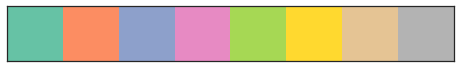

In [6]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

# 노인생활인구 상권 clustering

In [7]:
df3=pd.merge(elderly_life,market,on="행정동")
df3

,행정동,전체평균,유통업체수
0,가락1동,6173,0
1,가락2동,5619,1
2,가락본동,7463,0
3,가리봉동,2121,0
4,가산동,6771,5
...,...,...,...
417,효창동,2089,0
418,후암동,2825,0
419,휘경1동,3352,1
420,휘경2동,3962,0


In [8]:
df3=df3[df3["유통업체수"]>0]
df3
df3=df3.reset_index(drop=True)
df3

,행정동,전체평균,유통업체수
0,가락2동,5619,1
1,가산동,6771,5
2,가양2동,5035,1
3,가양3동,2576,1
4,갈현2동,5146,1
...,...,...,...
234,황학동,2870,3
235,회기동,3202,1
236,회현동,5335,9
237,휘경1동,3352,1


In [9]:
# scaling
scaler = RobustScaler()
df3_scale=pd.DataFrame(scaler.fit_transform(df3[['전체평균','유통업체수']]),columns=df3[['전체평균','유통업체수']].columns)
df3_scale.insert(0, '행정동', df3['행정동'])
df3_scale

,행정동,전체평균,유통업체수
0,가락2동,0.226866,0.0
1,가산동,0.656716,4.0
2,가양2동,0.008955,0.0
3,가양3동,-0.908582,0.0
4,갈현2동,0.050373,0.0
...,...,...,...
234,황학동,-0.798881,2.0
235,회기동,-0.675000,0.0
236,회현동,0.120896,8.0
237,휘경1동,-0.619030,0.0


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


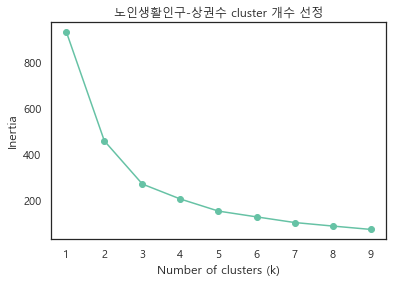

In [10]:
# elbow
data=df3_scale.values
X=data[:,1:]

num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('노인생활인구-상권수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 3

Text(0.5, 1.0, '노인 생활인구와 상권 clustering')

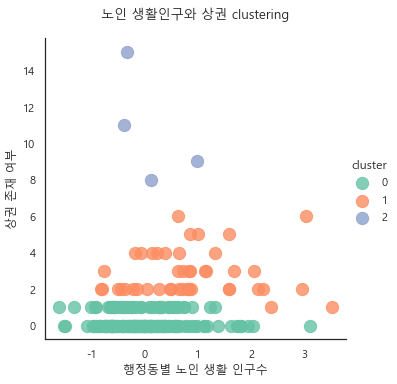

In [12]:
# clustering
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df3_scale['cluster'] = kmeans.labels_

sns.lmplot(x='전체평균',y='유통업체수', data = df3_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('행정동별 노인 생활 인구수')
plt.ylabel('상권 존재 여부')
plt.title('노인 생활인구와 상권 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

의미 X

전체평균 즉 생활인구가 중위수 이상인것만 추출하여 다시 진행

In [13]:
df3_scale_0 = df3_scale[df3_scale['전체평균']>=0]
df3_scale_0

,행정동,전체평균,유통업체수,cluster
0,가락2동,0.226866,0.0,0
1,가산동,0.656716,4.0,1
2,가양2동,0.008955,0.0,0
4,갈현2동,0.050373,0.0,0
5,개봉2동,0.308209,0.0,0
...,...,...,...,...
222,하계1동,0.275000,0.0,0
223,한강로동,0.986940,9.0,2
230,화곡1동,2.136940,2.0,1
236,회현동,0.120896,8.0,2


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


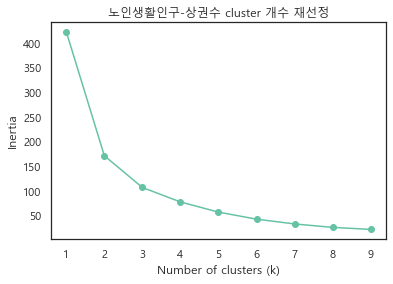

In [14]:
# elbow
data = df3_scale_0.values
X=data[:,1:-1]

num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('노인생활인구-상권수 cluster 개수 재선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, '노인 생활인구와 상권 2차 clustering')

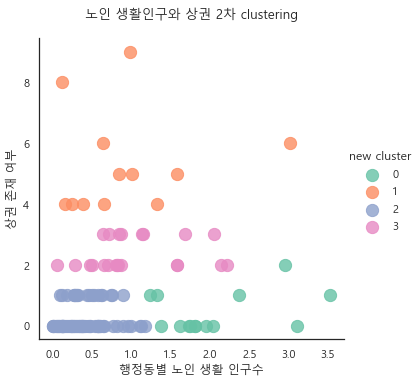

In [15]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df3_scale_0['new cluster'] = kmeans.labels_

sns.lmplot(x='전체평균',y='유통업체수', data = df3_scale_0, fit_reg=False, scatter_kws={"s":150},hue="new cluster")
plt.xlabel('행정동별 노인 생활 인구수')
plt.ylabel('상권 존재 여부')
plt.title('노인 생활인구와 상권 2차 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster1 (상단) 추출

In [17]:
result = df3_scale_0[df3_scale_0["new cluster"]==1]
result

,행정동,전체평균,유통업체수,cluster,new cluster
1,가산동,0.656716,4.0,1,1
19,구의3동,0.243657,4.0,1,1
23,길음1동,0.391791,4.0,1,1
45,독산1동,0.635448,6.0,1,1
90,삼성1동,0.151119,4.0,1,1
102,서교동,1.008582,5.0,1,1
163,영등포동,1.576866,5.0,1,1
191,잠실3동,1.323134,4.0,1,1
192,잠실6동,0.848881,5.0,1,1
201,종로1.2.3.4가동,3.025000,6.0,1,1


In [18]:
result.to_csv("노인생활인구_상권수_KMEANS.csv",encoding="cp949")